# floyd warshall

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

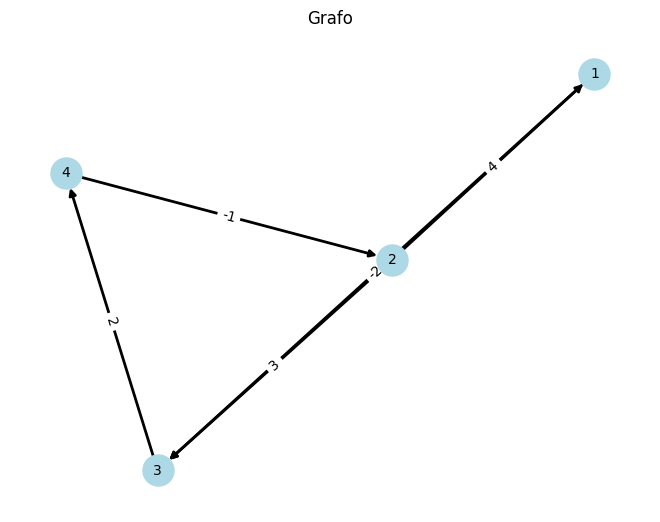

In [64]:
# Grafo orientado com pesos
G = nx.DiGraph()

# Adicionando nós
G.add_nodes_from([1,2,3, 4])

# Adicionando arestas com pesos
G.add_weighted_edges_from([
    (1, 3, -2), 
    (2, 1, 4), (2, 3, 3),
    (3,4,2),
    (4,2,-1)
])

# Desenhando o grafo
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo")
plt.show()

In [65]:

# Obter a lista de nós e criar uma matriz de adjacência vazia
nodes = list(G.nodes())
adj_matrix = np.zeros((len(nodes), len(nodes)))

# Preencher a matriz de adjacência com os pesos das arestas
for edge in G.edges(data=True):
    u, v, weight = edge[0], edge[1], edge[2]['weight']
    if u in nodes and v in nodes:  # Garantir que os nós estão na lista
        adj_matrix[nodes.index(u), nodes.index(v)] = weight
    else:
        print(f"Warning: Edge ({u}, {v}) has nodes not in nodelist.")

# Exibir a matriz de adjacência
print("Matriz de Adjacência:")
print(adj_matrix)

Matriz de Adjacência:
[[ 0.  0. -2.  0.]
 [ 4.  0.  3.  0.]
 [ 0.  0.  0.  2.]
 [ 0. -1.  0.  0.]]


In [66]:
fw = nx.floyd_warshall(G, weight="weight")
results = {a: dict(b) for a, b in fw.items()}
print(results)


{1: {1: 0, 3: -2, 2: -1, 4: 0}, 2: {2: 0, 1: 4, 3: 2, 4: 4}, 3: {3: 0, 4: 2, 1: 5, 2: 1}, 4: {4: 0, 2: -1, 1: 3, 3: 1}}


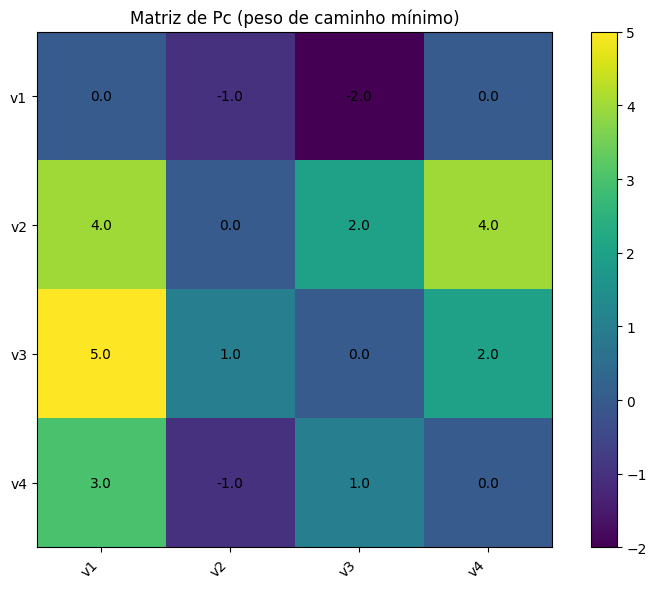

In [67]:

def plot_matriz_with_vertices(matriz, title):
    """
    Plots a heatmap representation of the matrix with corresponding vertex labels
    on both rows and columns.

    Args:
        matriz (np.ndarray): The matrix to be plotted.
        title (str): The title for the plot.
    """

    plt.figure(figsize=(8, 6))  # Adjust figure size for better readability

    # Create labels for rows and columns
    row_labels = [f"v{i+1}" for i in range(matriz.shape[0])]
    col_labels = row_labels.copy()

    # Plot the heatmap with annotations
    plt.imshow(matriz, cmap='viridis', interpolation='nearest')
    for i in range(matriz.shape[0]):
        for j in range(matriz.shape[1]):
            plt.text(j, i, matriz[i, j], ha='center', va='center', color='black')

    # Add row and column labels
    plt.xticks(np.arange(len(col_labels)), col_labels, rotation=45, ha='right')  # Rotate column labels
    plt.yticks(np.arange(len(row_labels)), row_labels)

    # Add colorbar and title
    plt.colorbar()
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Example usage (assuming you have the 'results' dictionary)
num_nodes = len(results)
matriz = np.zeros((num_nodes, num_nodes))

for i in range(1, num_nodes + 1):
    for j in range(1, num_nodes + 1):
        if j in results[i]:
            matriz[i - 1, j - 1] = results[i][j]
        else:
            matriz[i - 1, j - 1] = np.inf if i != j else 0

plot_matriz_with_vertices(matriz, "Matriz de Pc (peso de caminho mínimo)")
